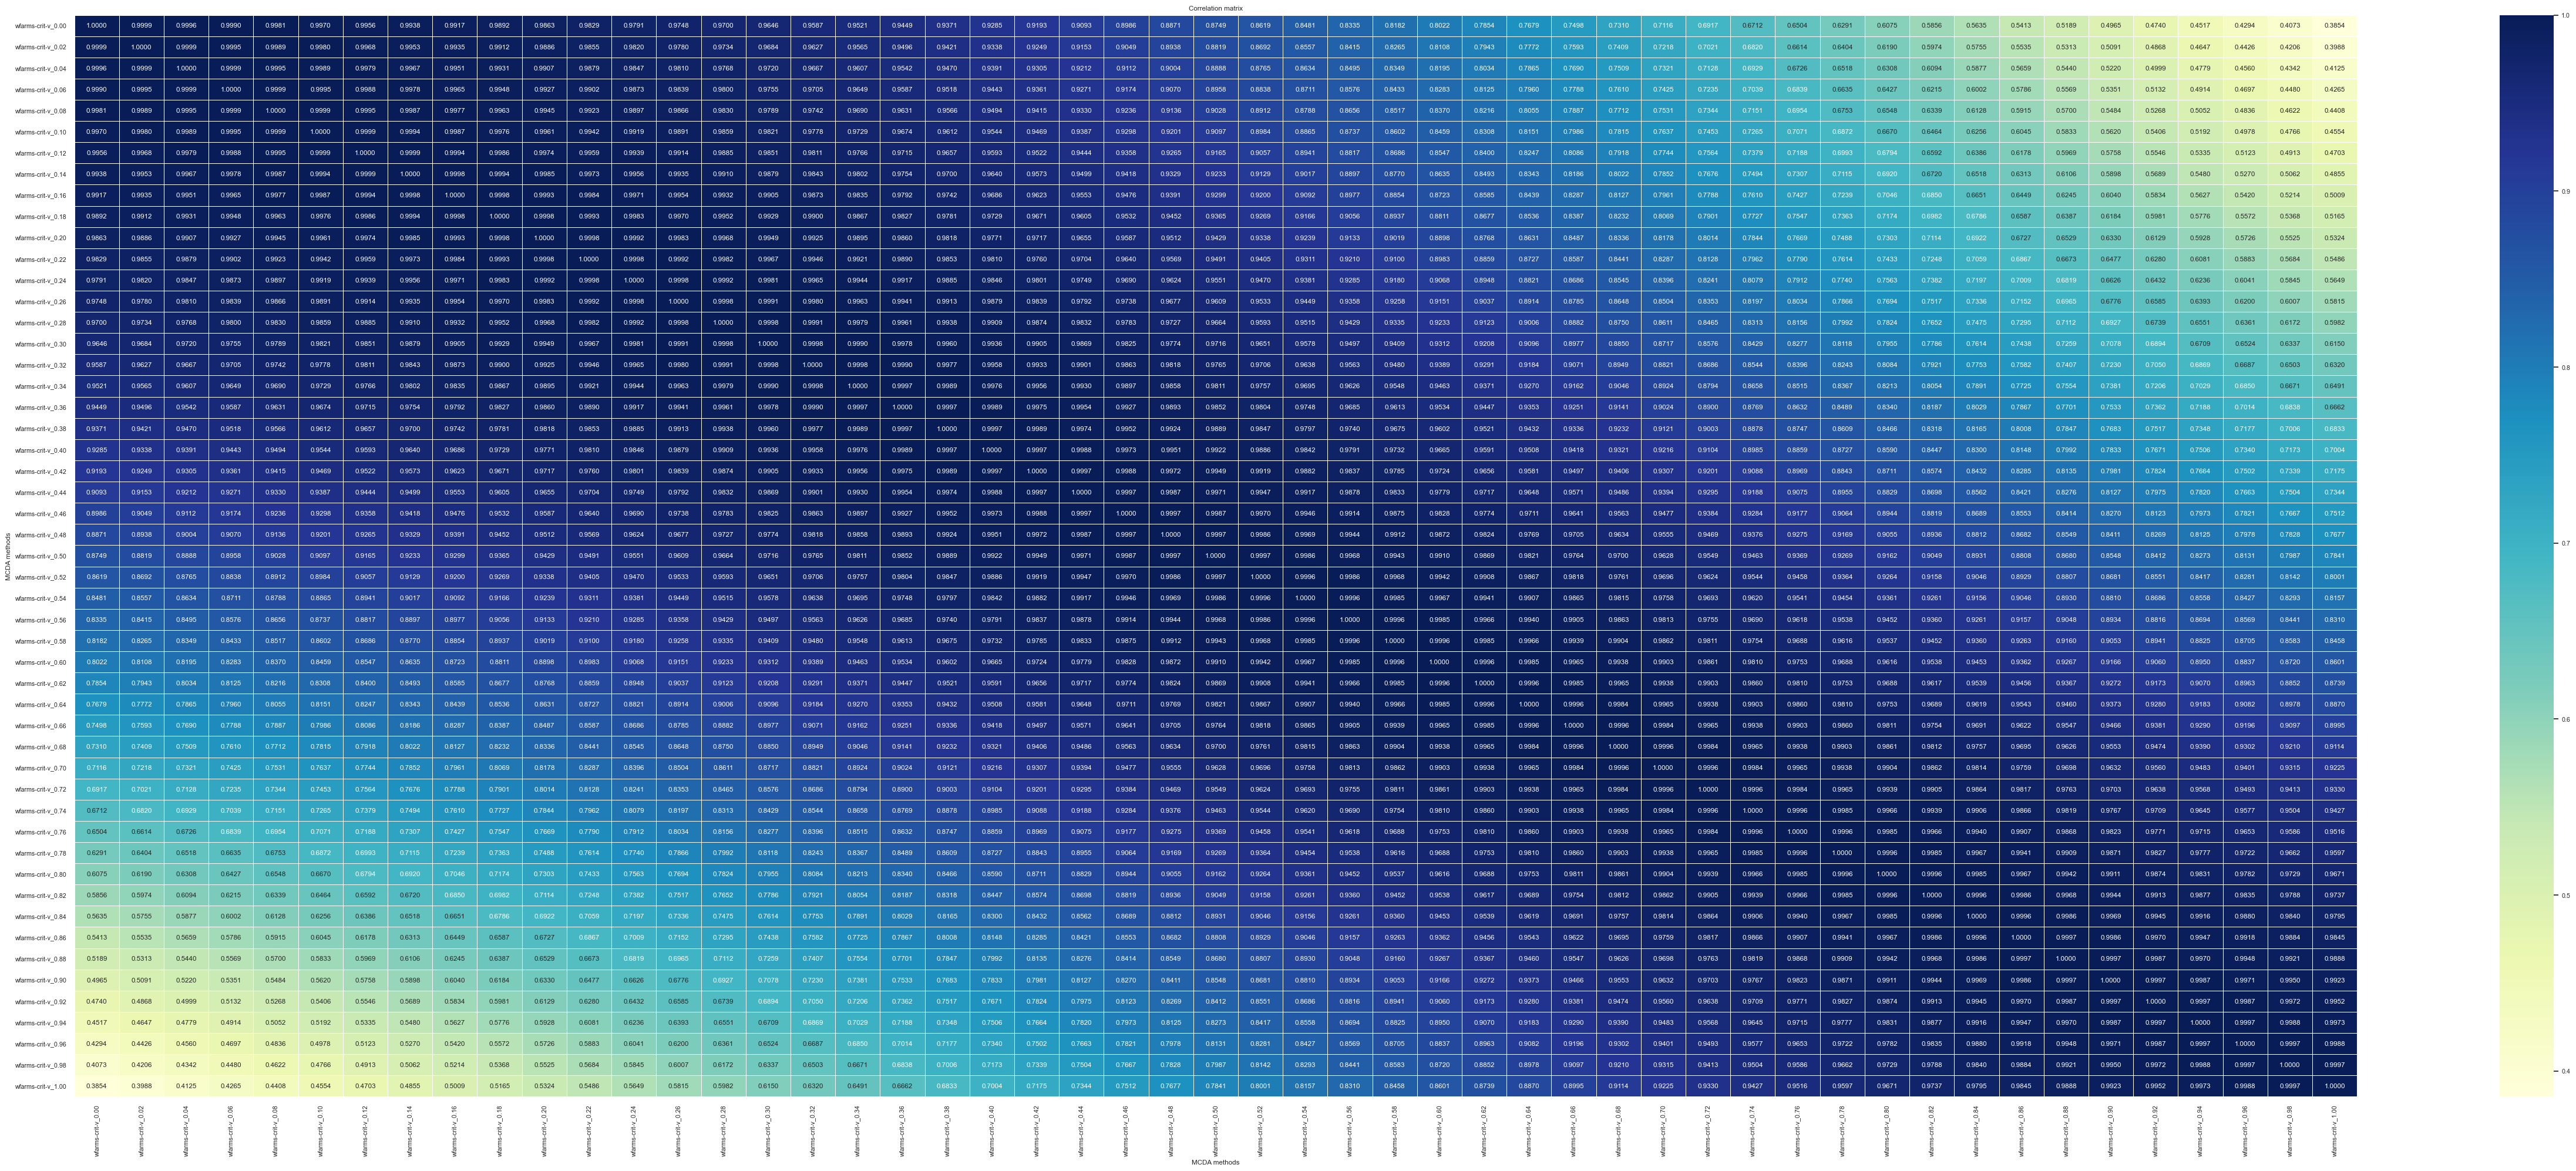

In [40]:
import numpy as np
import pandas as pd
from comparator.comparison import Comparison
from pyrepo_mcda.weighting_methods import critic_weighting, entropy_weighting

from vikor_evaluator import VikorEvaluator

data = pd.read_csv('wind_farms_data.csv', index_col=0)

impacts = data.iloc[-1]
# print(impacts)

data = data.iloc[:-1]
# print(data)


comparison = Comparison(data.shape[0], data.shape[1])
comparison.add_decision_problem('wfarms', data, impacts)

# weights = np.full(data.shape[1], 1/data.shape[1])
# comparison.add_weights_set('eq', weights)

weights = critic_weighting(data.to_numpy())
comparison.add_weights_set('crit', weights)

# weights = entropy_weighting(data.to_numpy())
# comparison.add_weights_set('ent', weights)

for v in np.arange(0, 1.001, 0.02):
    eval = VikorEvaluator(v)
    comparison.add_evaluator(f'v_{v:.2f}', eval)

comparison.compute()
plt = comparison.plot_correlations_heatmap(figure_size=(50, 20))
plt.show()

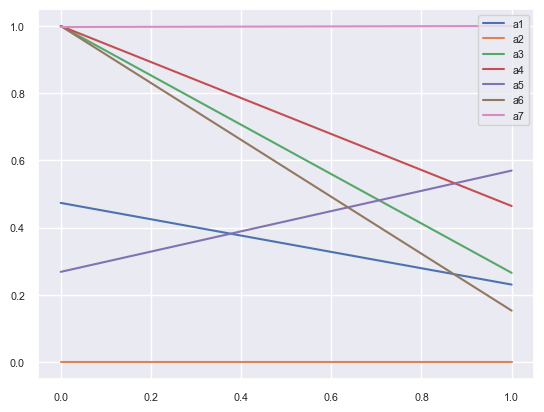

In [41]:
from matplotlib import pyplot as plt
scores = pd.DataFrame(comparison.scores['wfarms']['crit'])

x = np.arange(0, 1.001, 0.02)
a1 = scores.iloc[0]
a2 = scores.iloc[1]
a3 = scores.iloc[2]
a4 = scores.iloc[3]
a5 = scores.iloc[4]
a6 = scores.iloc[5]
a7 = scores.iloc[6]

plt.plot(x, a1, label='a1')
plt.plot(x, a2, label='a2')
plt.plot(x, a3, label='a3')
plt.plot(x, a4, label='a4')
plt.plot(x, a5, label='a5')
plt.plot(x, a6, label='a6')
plt.plot(x, a7, label='a7')
plt.legend()
plt.show()


In [42]:
print(list(zip(x, a7)))

[(0.0, 0.9970184859097906), (0.02, 0.9970781161915948), (0.04, 0.9971377464733989), (0.06, 0.9971973767552031), (0.08, 0.9972570070370074), (0.1, 0.9973166373188115), (0.12, 0.9973762676006157), (0.14, 0.9974358978824198), (0.16, 0.997495528164224), (0.18, 0.9975551584460283), (0.2, 0.9976147887278324), (0.22, 0.9976744190096366), (0.24, 0.9977340492914408), (0.26, 0.997793679573245), (0.28, 0.9978533098550493), (0.3, 0.9979129401368534), (0.32, 0.9979725704186575), (0.34, 0.9980322007004618), (0.36, 0.9980918309822661), (0.38, 0.9981514612640702), (0.4, 0.9982110915458744), (0.42, 0.9982707218276785), (0.44, 0.9983303521094828), (0.46, 0.998389982391287), (0.48, 0.9984496126730911), (0.5, 0.9985092429548953), (0.52, 0.9985688732366995), (0.54, 0.9986285035185036), (0.56, 0.9986881338003079), (0.58, 0.9987477640821121), (0.6, 0.9988073943639162), (0.62, 0.9988670246457204), (0.64, 0.9989266549275246), (0.66, 0.9989862852093288), (0.68, 0.999045915491133), (0.7000000000000001, 0.9991055

In [43]:
ranks = scores.rank(axis=0, ascending=False)
ranks


,v_0.00,v_0.02,v_0.04,v_0.06,v_0.08,v_0.10,v_0.12,v_0.14,v_0.16,v_0.18,...,v_0.82,v_0.84,v_0.86,v_0.88,v_0.90,v_0.92,v_0.94,v_0.96,v_0.98,v_1.00
Ai,,,,,,,,,,,,,,,,,,,,,
A1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
A2,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
A3,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
A4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
A5,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
A6,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
A7,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [44]:
scores

,v_0.00,v_0.02,v_0.04,v_0.06,v_0.08,v_0.10,v_0.12,v_0.14,v_0.16,v_0.18,...,v_0.82,v_0.84,v_0.86,v_0.88,v_0.90,v_0.92,v_0.94,v_0.96,v_0.98,v_1.00
Ai,,,,,,,,,,,,,,,,,,,,,
A1,0.473516,0.468654,0.463792,0.458930,0.454068,0.449206,0.444344,0.439481,0.434619,0.429757,...,0.274170,0.269308,0.264446,0.259584,0.254721,0.249859,0.244997,0.240135,0.235273,0.230411
A2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3,1.000000,0.985308,0.970615,0.955923,0.941230,0.926538,0.911845,0.897153,0.882460,0.867768,...,0.397608,0.382916,0.368223,0.353531,0.338838,0.324146,0.309453,0.294761,0.280068,0.265376
A4,1.000000,0.989285,0.978570,0.967855,0.957141,0.946426,0.935711,0.924996,0.914281,0.903566,...,0.560692,0.549977,0.539262,0.528547,0.517832,0.507117,0.496403,0.485688,0.474973,0.464258
A5,0.268335,0.274363,0.280391,0.286418,0.292446,0.298474,0.304502,0.310530,0.316558,0.322586,...,0.515478,0.521506,0.527534,0.533561,0.539589,0.545617,0.551645,0.557673,0.563701,0.569729
A6,1.000000,0.983057,0.966115,0.949172,0.932230,0.915287,0.898345,0.881402,0.864460,0.847517,...,0.305357,0.288414,0.271472,0.254529,0.237587,0.220644,0.203702,0.186759,0.169817,0.152874
A7,0.997018,0.997078,0.997138,0.997197,0.997257,0.997317,0.997376,0.997436,0.997496,0.997555,...,0.999463,0.999523,0.999583,0.999642,0.999702,0.999761,0.999821,0.999881,0.999940,1.000000


In [25]:
import numpy as np
from scipy.stats import rankdata
arr = np.array([[4,2,7,1], [4,2,7,1]])
ranks = rankdata(arr, axis=1)
ranks

array([[3., 2., 4., 1.],
       [3., 2., 4., 1.]])

In [1]:
import pandas as pd

data1 = {"a":[1.,3.,5.,2.],
         "b":[4.,8.,3.,7.],
         "c":[5.,45.,67.,34]}
data2 = {"a":[4.],
         "b":[2.],
         "c":[11.]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2) 

df1.div(df2.iloc[0], axis='columns')

,a,b,c
0,0.25,2.0,0.454545
1,0.75,4.0,4.090909
2,1.25,1.5,6.090909
3,0.50,3.5,3.090909
